# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [46]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

file_path = r"C:\Users\Yvaine\bootcamp_Rui_Han\homework\stage08_EDA\data\personal_finance_tracker_dataset.csv"
df = pd.read_csv(file_path)

df.head()

,date,user_id,monthly_income,monthly_expense,budget_goal,financial_scenario,credit_score,debt_to_income_ratio,loan_payment,investment_amount,subscription_services,emergency_fund,transaction_count,fraud_flag,discretionary_spending,essential_spending,income_type,rent_or_mortgage,category,cash_flow_status,financial_advice_score,financial_stress_level,actual_savings,savings_goal_met
0,2019/1/1,1584,3119.58,3156.576,3676.11,inflation,721,0.56,125.77,689.22,3,510.58,68,0,857.55,1910.85,Freelance,1501.65,Investments,Positive,8.3,Low,0.00,0
1,2019/1/31,1045,3262.44,3450.588,2607.17,inflation,670,0.42,454.19,360.34,4,1154.41,41,0,534.51,3165.20,Salary,1603.17,Investments,Positive,22.6,Low,0.00,0
2,2019/3/2,1756,2931.20,3092.952,3004.14,inflation,691,0.24,971.82,0.00,5,1433.02,90,0,353.67,1504.56,Freelance,1097.82,Healthcare,Positive,58.8,Low,0.00,0
3,2019/4/1,1724,3506.79,3035.110,3346.97,normal,717,0.16,482.76,182.06,5,227.37,94,0,594.08,1450.72,Freelance,1155.64,Groceries,Positive,74.5,Low,1179.20,0
4,2019/5/1,1600,4606.87,3637.154,2670.09,inflation,795,0.25,263.74,342.78,9,589.81,73,0,556.86,1000.00,Salary,1170.86,Utilities,Negative,38.7,High,2424.29,0


## 1) First look

In [47]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   user_id                 3000 non-null   int64  
 2   monthly_income          3000 non-null   float64
 3   monthly_expense         3000 non-null   float64
 4   budget_goal             3000 non-null   float64
 5   financial_scenario      3000 non-null   object 
 6   credit_score            3000 non-null   int64  
 7   debt_to_income_ratio    3000 non-null   float64
 8   loan_payment            3000 non-null   float64
 9   investment_amount       3000 non-null   float64
 10  subscription_services   3000 non-null   int64  
 11  emergency_fund          3000 non-null   float64
 12  transaction_count       3000 non-null   int64  
 13  fraud_flag              3000 non-null   int64  
 14  discretionary_spending  3000 non-null   

(None,
 date                      0
 user_id                   0
 monthly_income            0
 monthly_expense           0
 budget_goal               0
 financial_scenario        0
 credit_score              0
 debt_to_income_ratio      0
 loan_payment              0
 investment_amount         0
 subscription_services     0
 emergency_fund            0
 transaction_count         0
 fraud_flag                0
 discretionary_spending    0
 essential_spending        0
 income_type               0
 rent_or_mortgage          0
 category                  0
 cash_flow_status          0
 financial_advice_score    0
 financial_stress_level    0
 actual_savings            0
 savings_goal_met          0
 dtype: int64)

## 2) Numeric profile

In [48]:
desc = df[['monthly_income','monthly_expense','budget_goal','credit_score']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
monthly_income,3000.0,4004.267347,1000.107096,685.280,3362.2500,4008.075,4659.040,7407.940,0.014824,0.201442
monthly_expense,3000.0,3607.233300,680.008413,1202.188,3147.9540,3611.301,4052.708,5975.732,0.019069,0.085671
budget_goal,3000.0,2811.070463,490.855344,1175.570,2481.9575,2822.285,3131.000,4386.500,0.016247,-0.044473
credit_score,3000.0,679.923667,49.970847,515.000,646.0000,679.000,713.000,847.000,0.055131,-0.061020


## 3) Distributions (TODO: add at least 3)

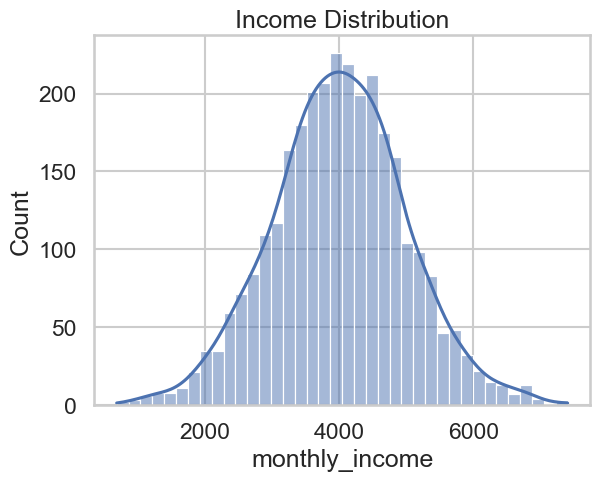

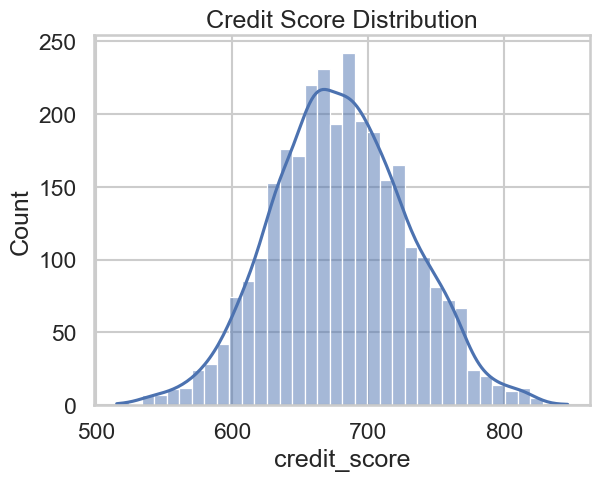

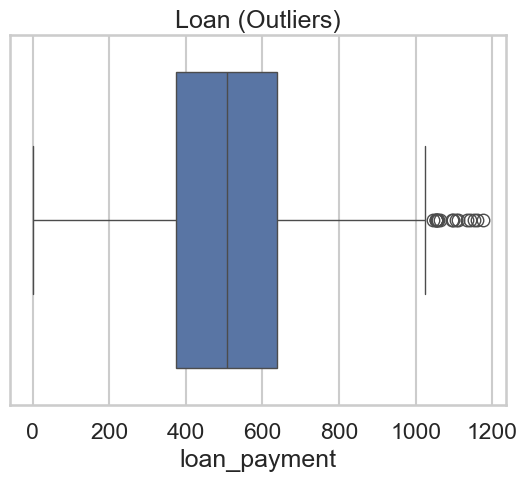

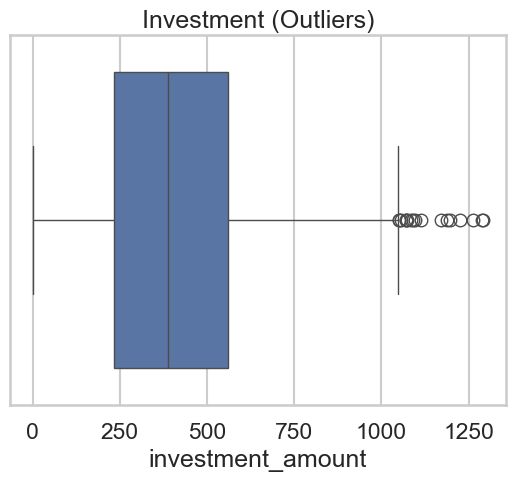

In [49]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['monthly_income'], kde=True)
plt.title('Income Distribution')
plt.show()

sns.histplot(df['credit_score'], kde=True)
plt.title('Credit Score Distribution')
plt.show()


# TODO: boxplot for outliers
sns.boxplot(x=df['loan_payment'])
plt.title('Loan (Outliers)')
plt.show()

sns.boxplot(x=df['investment_amount'])
plt.title('Investment (Outliers)')
plt.show()

## 4) Relationships (TODO: add at least 2)

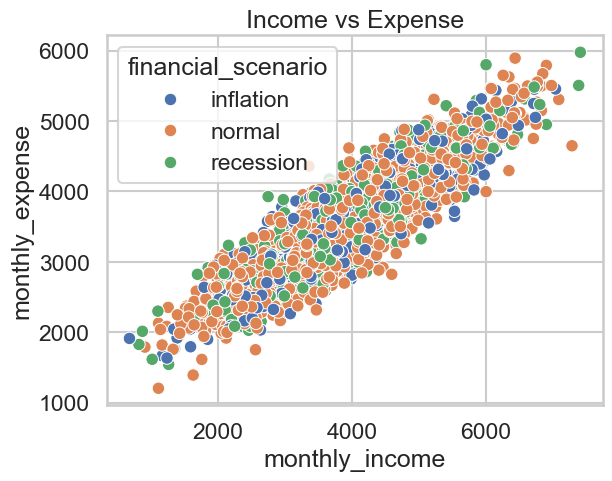

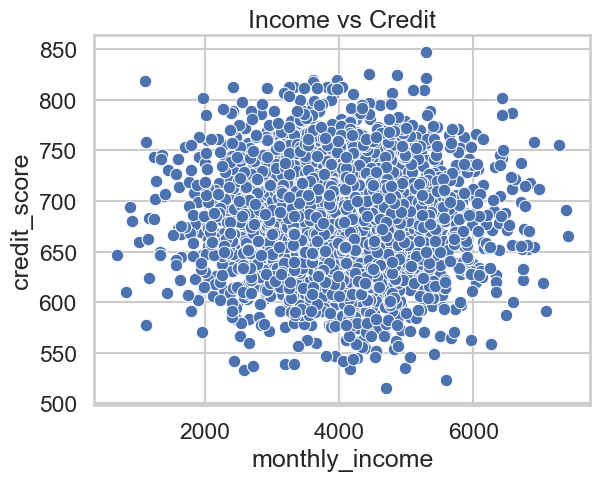

In [51]:
sns.scatterplot(data=df, x='monthly_income', y='monthly_expense',hue = "financial_scenario")
plt.title('Income vs Expense')
plt.show()


sns.scatterplot(data=df, x='monthly_income', y='credit_score')
plt.title('Income vs Credit')
plt.show()

## 5) (Optional) Correlation matrix

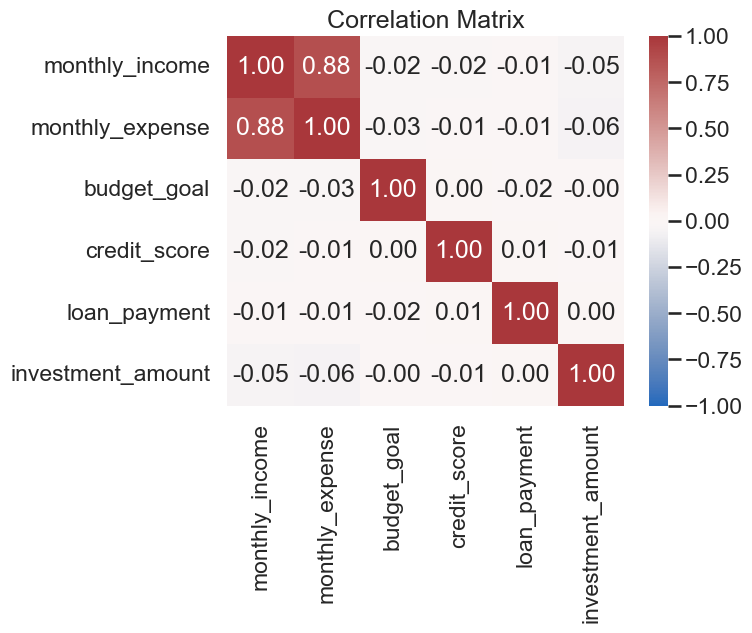

,monthly_income,monthly_expense,budget_goal,credit_score,loan_payment,investment_amount
monthly_income,1.000000,0.881994,-0.020765,-0.017054,-0.010193,-0.047464
monthly_expense,0.881994,1.000000,-0.030820,-0.014848,-0.005243,-0.057363
budget_goal,-0.020765,-0.030820,1.000000,0.002781,-0.015595,-0.003045
credit_score,-0.017054,-0.014848,0.002781,1.000000,0.006161,-0.013223
loan_payment,-0.010193,-0.005243,-0.015595,0.006161,1.000000,0.000077
investment_amount,-0.047464,-0.057363,-0.003045,-0.013223,0.000077,1.000000


In [52]:
corr = df[['monthly_income','monthly_expense','budget_goal','credit_score','loan_payment','investment_amount']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- Insights

！The creditscore distribution is left-skewed, with a larger share of low-credit observations.

！Extreme outliers are present in the Loan and Investment variable.

！Income and spend positively correlated.

- Assumptions & risks

! Assumption: continuous, roughly monotonic relationship; no hidden confounders.  

! Risk: skew/extremes inflate correlation; outliers mask true slope or spuriously strengthen it.

- Next steps before modeling ：Remove or adjust the outliers.